<a href="https://colab.research.google.com/github/KimaruThagna/data-science-in-pycaret/blob/main/classification_in_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
pip install pycaret scikit-learn==0.23.2 shap

     |████████████████████████████████| 327kB 5.4MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463889 sha256=e9529c7d2d25f9796c79b658996b0e518d6cf4624ac800b05ced312545759aeb
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


In [1]:
from pycaret.datasets import get_data
dataset = get_data('juice')
dataset

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1066,CH,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0
1066,1067,CH,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1067,1068,MM,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1068,1069,CH,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0


Setup the data by providing the target variable

In [3]:

from pycaret.classification import *
setup_1 = setup(dataset, target='Purchase',ignore_features=['Id'])


,Description,Value
0,session_id,4087
1,Target,Purchase
2,Target Type,Binary
3,Label Encoded,"CH: 0, MM: 1"
4,Original Data,"(1070, 19)"
5,Missing Values,False
6,Numeric Features,12
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
#perform model comparison
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8397,0.0000,0.7683,0.8048,0.7810,0.6552,0.6607,0.021
lda,Linear Discriminant Analysis,0.8383,0.9021,0.7648,0.8054,0.7791,0.6523,0.6582,0.021
lr,Logistic Regression,0.8290,0.9022,0.7329,0.8047,0.7618,0.6294,0.6358,0.454
gbc,Gradient Boosting Classifier,0.8263,0.8995,0.7720,0.7795,0.7699,0.6312,0.6371,0.140
ada,Ada Boost Classifier,0.8196,0.8899,0.7686,0.7605,0.7608,0.6165,0.6203,0.137
catboost,CatBoost Classifier,0.8183,0.8983,0.7507,0.7781,0.7564,0.6125,0.6201,1.218
xgboost,Extreme Gradient Boosting,0.8090,0.8815,0.7612,0.7505,0.7506,0.5967,0.6018,1.254
lightgbm,Light Gradient Boosting Machine,0.8023,0.8857,0.7506,0.7440,0.7415,0.5824,0.5881,0.071
rf,Random Forest Classifier,0.7876,0.8713,0.7010,0.7393,0.7137,0.5458,0.5517,0.517
et,Extra Trees Classifier,0.7755,0.8306,0.6797,0.7227,0.6959,0.5187,0.5234,0.518


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=4087,
                solver='auto', tol=0.001)

From above, the best model is the RidgeClassifier

In [5]:
best_model = create_model('ridge')
best_model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7733,0.0,0.5714,0.7619,0.6531,0.4898,0.5010
1,0.8267,0.0,0.8571,0.7273,0.7869,0.6425,0.6486
2,0.8133,0.0,0.6429,0.8182,0.7200,0.5830,0.5925
3,0.8667,0.0,0.7857,0.8462,0.8148,0.7109,0.7121
4,0.8267,0.0,0.7500,0.7778,0.7636,0.6269,0.6271
5,0.8133,0.0,0.8214,0.7188,0.7667,0.6123,0.6161
6,0.8400,0.0,0.8571,0.7500,0.8000,0.6677,0.6718
7,0.8800,0.0,0.8621,0.8333,0.8475,0.7486,0.7489
8,0.8514,0.0,0.7857,0.8148,0.8000,0.6818,0.6821
9,0.9054,0.0,0.7500,1.0000,0.8571,0.7886,0.8068


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=4087,
                solver='auto', tol=0.001)

In [10]:
tuned_ridge_clf = tune_model(best_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7733,0.0,0.5714,0.7619,0.6531,0.4898,0.5010
1,0.8267,0.0,0.8571,0.7273,0.7869,0.6425,0.6486
2,0.8267,0.0,0.6429,0.8571,0.7347,0.6098,0.6238
3,0.8667,0.0,0.7857,0.8462,0.8148,0.7109,0.7121
4,0.8267,0.0,0.7500,0.7778,0.7636,0.6269,0.6271
5,0.8133,0.0,0.8214,0.7188,0.7667,0.6123,0.6161
6,0.8400,0.0,0.8571,0.7500,0.8000,0.6677,0.6718
7,0.8800,0.0,0.8621,0.8333,0.8475,0.7486,0.7489
8,0.8514,0.0,0.7857,0.8148,0.8000,0.6818,0.6821
9,0.9054,0.0,0.7500,1.0000,0.8571,0.7886,0.8068


# Model Plots

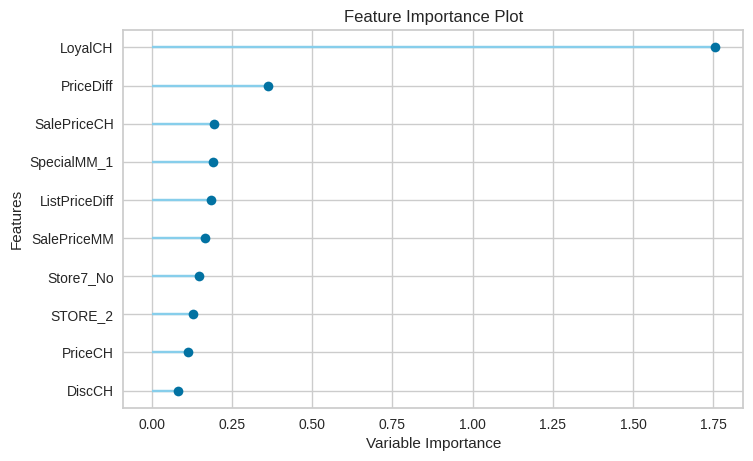

In [27]:
plot_model(tuned_ridge_clf,plot='feature') #pr, boundary feature

Try out ensembles to improve model performance

In [16]:
bagged_ridge = ensemble_model(best_model, method='Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7733,0.7770,0.5357,0.7895,0.6383,0.4819,0.5011
1,0.8000,0.8564,0.7857,0.7097,0.7458,0.5816,0.5837
2,0.8400,0.8568,0.6429,0.9000,0.7500,0.6371,0.6566
3,0.8667,0.8875,0.7857,0.8462,0.8148,0.7109,0.7121
4,0.8267,0.8036,0.7500,0.7778,0.7636,0.6269,0.6271
5,0.8000,0.8522,0.7500,0.7241,0.7368,0.5756,0.5759
6,0.8533,0.8518,0.8571,0.7742,0.8136,0.6932,0.6956
7,0.8400,0.8718,0.7586,0.8148,0.7857,0.6583,0.6594
8,0.8378,0.8610,0.7500,0.8077,0.7778,0.6504,0.6515
9,0.8784,0.9033,0.6786,1.0000,0.8085,0.7241,0.7533


Turns out ensembling using bagging doesnt improve performance past tuning

# Model Evaluation

In [17]:
evaluate_model(tuned_ridge_clf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Model Interpretation

In [20]:
interpret_model(tuned_ridge_clf) # will not work since this is for tree based models
# can also plot reason eg interpret_model(model,plot='reason)

TypeError: ignored

## Save model as pkl file

In [22]:
save_model(tuned_ridge_clf,model_name='TunedRidgeClassifier')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Id'], id_columns=['Id'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Purchase',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 num...
                 ('fix_perfect', Remove_100(target='Purchase')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
       

## Loading saved Model

In [23]:
load_model('TunedRidgeClassifier')


Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['Id'], id_columns=['Id'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Purchase',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                num...
                ('fix_perfect', Remove_100(target='Purchase')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['traine